### Loading the Data

* instant - id of the record (integer)
* dteday - date of the record (yr-month-day)
* season - season of the record (integer, 1-4)
* 1: Spring
* 2: Summer
* 3: Fall
* 4: Winter
* yr - year of the record(integer, 0-1)
* 0: 2011
* 1: 2012
* mth - month of the record (integer, 1-12)
* hr - hour of the record (integer, 0-23)
* holiday - whether the day is a holiday or not (integer, 0-1)
* weekday - day of the week (integer, 1-7)
* workingday - whether the day is a working day (neither holiday nor weekend) or not (integer, 0-1)
* wheathersit - weather situation (integer, 1-4)
* 1: clear, few clouds, or partly cloudy
* 2: mist (no precipitation)
* 3: light rain or light snow
* 4: heavy rain, hail, or snow.
* temp - temperature in Celsius, normalized by dividing by the highest temperature recorded over these two years (float, [0, 1]).
* atemp - apparent temperature in Celsius, normalized by dividing by the highest apparent temperature over these two years (float, [0, 1]). Apparent temperature quantifies the temperature perceived by humans, combining wind chill, humidity, and actual temperature.
* hum - percentage of humidity (float, [0, 1]).
* windspeed - wind speed, normalized by dividing by the highest speed recorded over these two years (float, [0, 1])
* cnt - number of bikes rented (integer) Train set only, value to predict.

In [91]:
import numpy as np
import scipy as sp
#%pylab inline
%config InlineBackend.figure_format = 'retina'

In [92]:
# Load the training set
# Load the features
A = np.loadtxt('data/train.csv', delimiter=',', 
               skiprows=1, usecols=(2,3,4,5,6,7,8,9,10,11,12,13))

# Load the labels
y = np.loadtxt('data/train.csv', delimiter=',', skiprows=1, usecols=[14])

print A.shape
print A[0,:]
print y.shape
print y[0]

(10886, 12)
[ 1.      0.      1.      0.      0.      6.      0.      1.      0.24
  0.2879  0.81    0.    ]
(10886,)
16.0


In [93]:
# Load the features names
n = np.loadtxt('data/features_names.csv',dtype= str, delimiter=',',usecols=(2,3,4,5,6,7,8,9,10,11,12,13))

print n.shape
print n

(12,)
['season' 'yr' 'mnth' 'hr' 'holiday' 'weekday' 'workingday' 'weathersit'
 'temp' 'atemp' 'hum' 'windspeed']


In [94]:
# Load the test set
B = np.loadtxt('data/test.csv', delimiter=',', 
               skiprows=1,  usecols=(2,3,4,5,6,7,8,9,10,11,12,13))

print B.shape
print B[0,:]

# Load 'instant' column for test set
inst = np.loadtxt('data/test_instant.csv', skiprows=1)
inst = transpose(inst)
print inst

(6493, 12)
[ 1.      0.      1.      0.      0.      4.      1.      1.      0.26
  0.2273  0.56    0.3881]
[   432.    433.    434. ...,  17377.  17378.  17379.]


### Variables Exploration

In [95]:
# Feature labels
print n

['season' 'yr' 'mnth' 'hr' 'holiday' 'weekday' 'workingday' 'weathersit'
 'temp' 'atemp' 'hum' 'windspeed']


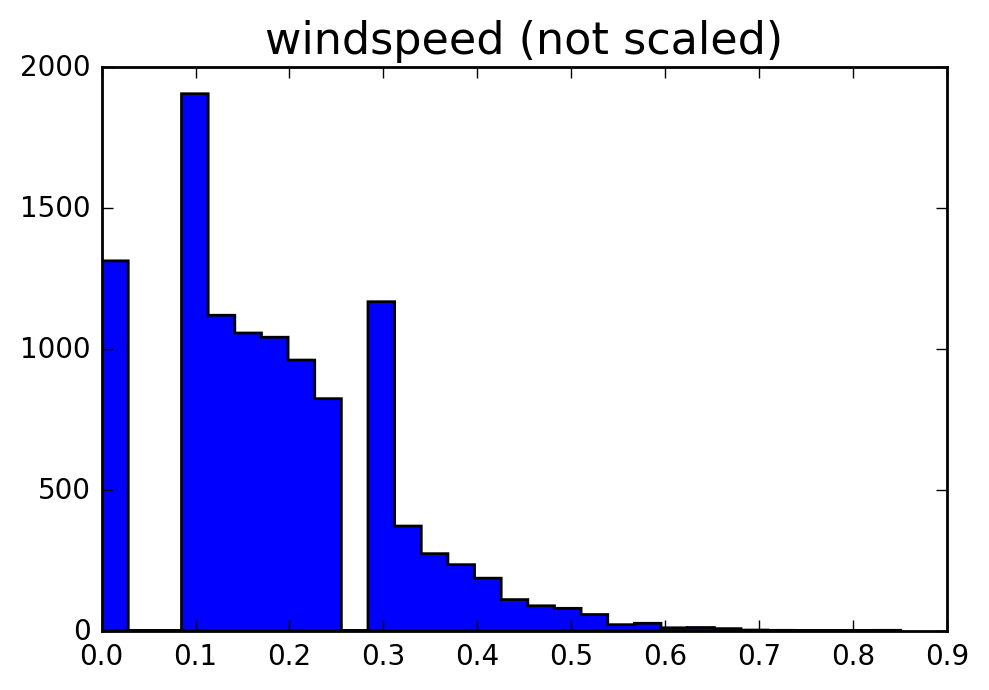

In [96]:
# Plot feature distribution

idx_1 = 11 # Feature number to be plotted
fig = plt.figure(figsize=(12, 8)) # (width, height)

fig.add_subplot(221) # 2 x 2 grid, 1st subplot
h = plt.hist(A[:,idx_1], bins=30, color='blue',histtype='stepfilled')
plt.title( '%s (not scaled)' % n[idx_1], fontsize=16)

correlation matrix:
[[ 1.          0.98494811]
 [ 0.98494811  1.        ]]


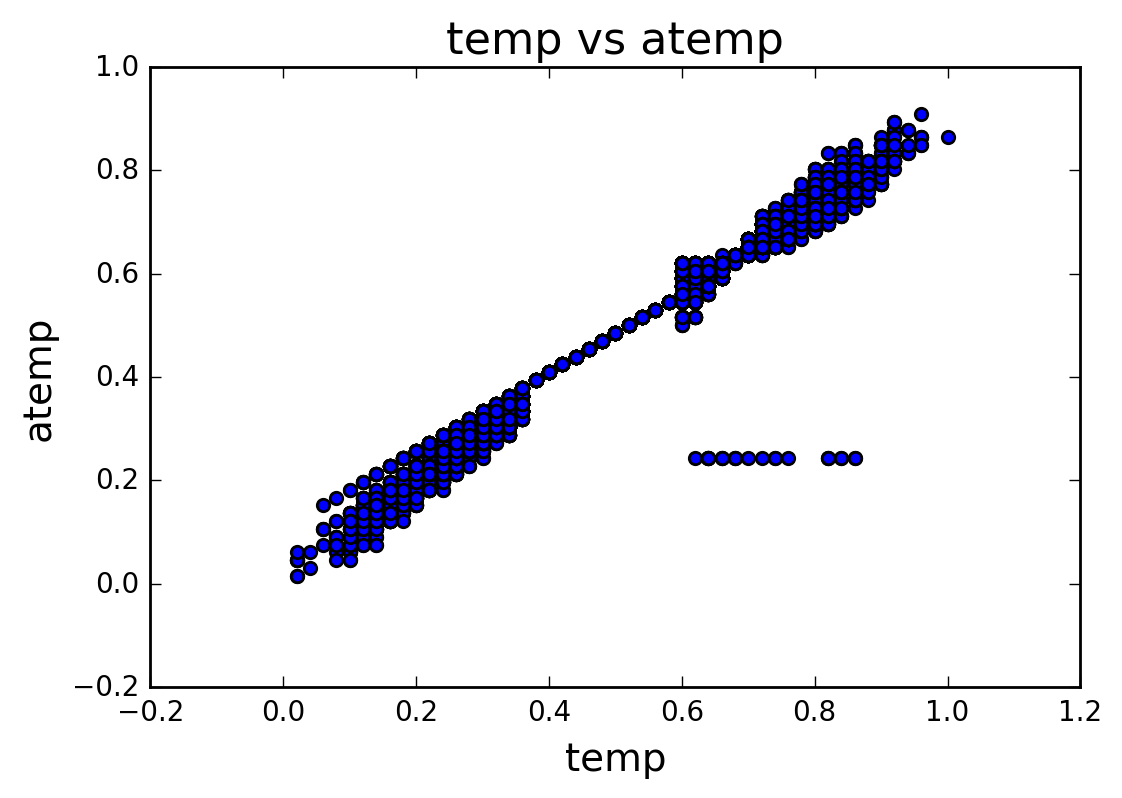

In [97]:
# Plot 2 features for corr exploration

idx_1 = 8
idx_2 = 9
plt.scatter(A[:,idx_1], A[:,idx_2])
plt.title( '%s vs %s' % (n[idx_1], n[idx_2]), fontsize=16)
plt.xlabel(n[idx_1], fontsize=14)
plt.ylabel(n[idx_2], fontsize=14)
plt.savefig("temp_atemp.png")

print 'correlation matrix:'
print numpy.corrcoef(A[:,idx_1], A[:,idx_2])

### Feature Engineering

In [98]:
#creating a variable to categorise "hr" in 8 groups
#for training set
hr_cat = np.zeros((10886,1),dtype=int)

for i in range(0,10886):
    if A[i,3]<15.5 and A[i,3]>=8.5:
        hr_cat[i]=4     

for i in range(0,10886):
    if A[i,3]<15.5 and A[i,3]<8.5 and A[i,3]<7.5:
        hr_cat[i]=2

for i in range(0,10886):
    if A[i,3]<15.5 and A[i,3]<8.5 and A[i,3]>=7.5:
        hr_cat[i]=3

for i in range(0,10886):
    if A[i,3]>=15.5 and A[i,3]>=18.5:
        hr_cat[i]=7

for i in range(0,10886):
    if A[i,3]>=15.5 and A[i,3]<18.5 and A[i,3]<16.5:
        hr_cat[i]=5
        

for i in range(0,10886):
    if A[i,3]>=15.5 and A[i,3]<18.5 and A[i,3]>=16.5:
        hr_cat[i]=6

hr_cat[A[:,3]<6.5]= 1
hr_cat[A[:,3]>=20.5]=8

#for test set
hr_catB = np.zeros((6493,1),dtype=int)

for i in range(0,6493):
    if B[i,3]<15.5 and B[i,3]>=8.5:
        hr_catB[i]=4     

for i in range(0,6493):
    if B[i,3]<15.5 and B[i,3]<8.5 and B[i,3]<7.5:
        hr_catB[i]=2

for i in range(0,6493):
    if B[i,3]<15.5 and B[i,3]<8.5 and B[i,3]>=7.5:
        hr_catB[i]=3

for i in range(0,6493):
    if B[i,3]>=15.5 and B[i,3]>=18.5:
        hr_catB[i]=7

for i in range(0,6493):
    if B[i,3]>=15.5 and B[i,3]<18.5 and B[i,3]<16.5:
        hr_catB[i]=5
        

for i in range(0,6493):
    if B[i,3]>=15.5 and B[i,3]<18.5 and B[i,3]>=16.5:
        hr_catB[i]=6

hr_catB[B[:,3]<6.5]= 1
hr_catB[B[:,3]>=20.5]=8

In [99]:
#creating a weekend variable
#for training set
weekend = np.zeros((10886,1),dtype=int)
for i in range(0,10886):
    if A[i,5]==0 or A[i,5]==6:
        weekend[i]=1

#for test set
weekendB = np.zeros((6493,1),dtype=int)
for i in range(0,6493):
    if B[i,5]==0 or B[i,5]==6:
        weekendB[i]=1

In [100]:
#compare relative cnt for "holiday"

holiday_cnt = sum(y[A[:,4]==1])

non_holiday_cnt = sum(y[A[:,4]==0])

holi = sum(A[:,4]==1)

relative_holi = holiday_cnt/holi
relative_non_holi = non_holiday_cnt/(10886-holi)

print "average holiday cnt %s" % relative_holi
print "average non holiday cnt %s" %relative_non_holi

average holiday cnt 185.877813505
average non holiday cnt 191.741654846


In [101]:
#creating a variable for peak times
#for training set
busy_cat = np.zeros((10886,1),dtype=int)

for i in range(0,10866):
    if 7<=A[i,3]<=18 and A[i,7]==1:
        busy_cat[i] = 1

#for test set
busy_catB = np.zeros((6493,1),dtype=int)

for i in range(0,6493):
    if 7<=B[i,3]<=18 and B[i,7]==1:
        busy_catB[i] = 1

In [102]:
#creating a variable for flop times
#for training set
flop_cat = np.zeros((10886,1))

for i in range(1,10886):
    if 1<=A[i,3]<=5 and A[i,7]==4 and A[i,9]<0.2:
        flop_cat[i] = 1

#for test set
flop_catB = np.zeros((6493,1))

for i in range(1,6493):
    if 1<=B[i,3]<=5 and B[i,7]==4 and B[i,9]<0.2:
        flop_catB[i] = 1

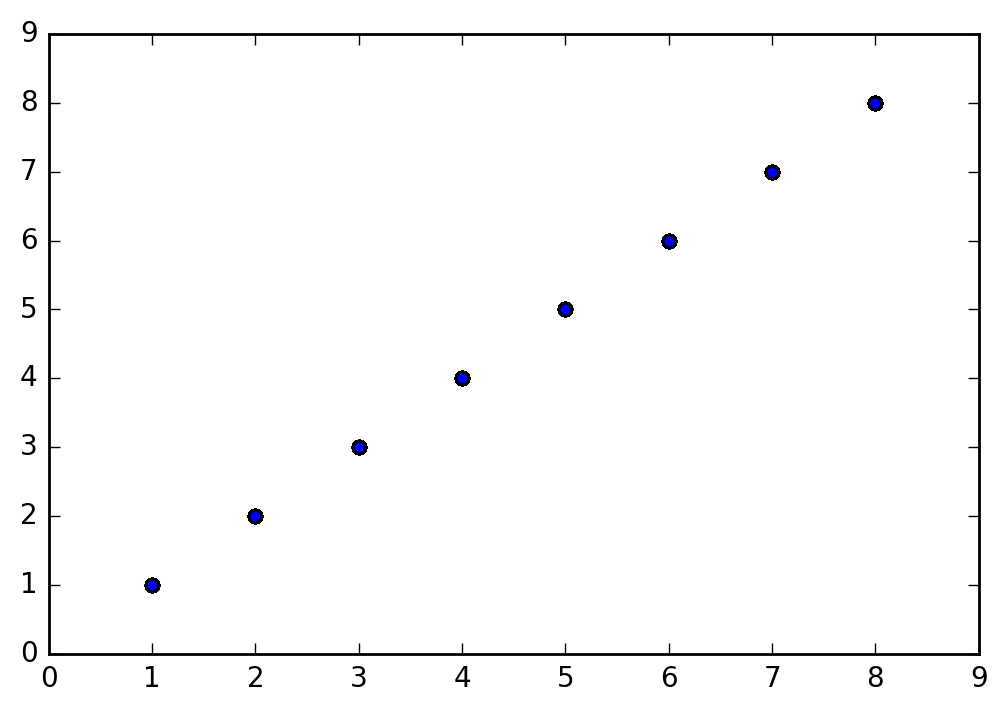

In [103]:
#create a variable for quarter
#training set
quarter = np.zeros((10886,1),dtype=int)

for i in range(0,10886):
    if A[i,1]==0 and A[i,2]<=3:
        quarter[i]=1
for i in range(0,10886):
    if A[i,1]==0 and A[i,2]>3:
        quarter[i]=2
for i in range(0,10886):
    if A[i,1]==0 and A[i,2]>6:
        quarter[i]=3
for i in range(0,10886):
    if A[i,1]==0 and A[i,2]>9:
        quarter[i]=4
quarter[A[:,1]==1]=5
for i in range(0,10886):
    if A[i,1]==1 and A[i,2]>3:
        quarter[i]=6
for i in range(0,10886):
    if A[i,1]==1 and A[i,2]>6:
        quarter[i]=7
for i in range(0,10886):
    if A[i,1]==1 and A[i,2]>9:
        quarter[i]=8

#test set
quarterB = np.zeros((6493,1),dtype=int)

for i in range(0,6493):
    if B[i,1]==0 and B[i,2]<=3:
        quarterB[i]=1
for i in range(0,6493):
    if B[i,1]==0 and B[i,2]>3:
        quarterB[i]=2
for i in range(0,6493):
    if B[i,1]==0 and B[i,2]>6:
        quarterB[i]=3
for i in range(0,6493):
    if B[i,1]==0 and B[i,2]>9:
        quarterB[i]=4
quarterB[B[:,1]==1]=5
for i in range(0,6493):
    if B[i,1]==1 and B[i,2]>3:
        quarterB[i]=6
for i in range(0,6493):
    if B[i,1]==1 and B[i,2]>6:
        quarterB[i]=7
for i in range(0,6493):
    if B[i,1]==1 and B[i,2]>9:
        quarterB[i]=8

plt.scatter(quarter,quarter)

In [104]:
print n

['season' 'yr' 'mnth' 'hr' 'holiday' 'weekday' 'workingday' 'weathersit'
 'temp' 'atemp' 'hum' 'windspeed']


In [105]:
# Standardise atemp, hum & windspeed
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()

#Create an array with the variables to standardise only
#for training set
scaled_features = np.delete(A,range(0,9),1)
print scaled_features.shape
scaled_features = scaler.fit_transform(scaled_features)

#for testing set
scaled_featuresB = np.delete(B,range(0,9),1)
print scaled_featuresB.shape
scaled_featuresB = scaler.fit_transform(scaled_featuresB)

(10886, 3)
(6493, 3)


In [106]:
#concatenation
#for training set
remaining_features = np.delete(A,range(8,12),1)
X = np.concatenate((remaining_features,scaled_features,hr_cat,weekend,busy_cat,quarter),axis=1)

#for test set
remaining_featuresB = np.delete(B,range(8,12),1)
T = np.concatenate((remaining_featuresB,scaled_featuresB,hr_catB,weekendB,busy_catB,quarterB),axis=1)

print X.shape
print T.shape

(10886, 15)
(6493, 15)


### Dummy Variables - DON'T RUN (unless for regression analysis)

In [107]:
#Creating dummy variables for linear regression
import pandas as pd
season = pd.get_dummies(A[:,0])
month = pd.get_dummies(A[:,2])
hour = pd.get_dummies(A[:,3])
day = pd.get_dummies(A[:,5])
weather = pd.get_dummies(A[:,7])

In [108]:
#Combining all dummy variables in a single array
dummies = np.concatenate((season, month, hour, day,weather),axis=1) 
print dummies[0,:]
print dummies.shape

[ 1.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  0.  0.  0.]
(10886, 51)


In [109]:
# Standardise temp, atemp, hum & windspeed
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()

#Create an array with the variables to standardise only
S = np.delete(A,range(0,8),1)
print S.shape
S = scaler.fit_transform(S)

(10886, 4)


In [110]:
#Creating an array without variables transformed in dummy & standardised variables
a = np.delete(A,(0,2,3,5,7,8,9,10,11),1)
print a.shape

(10886, 3)


In [111]:
#Combine non-dummy and dummy variables in a single array
X_dummy = np.concatenate((dummies,a,S),axis=1)
print X_dummy.shape
print X_dummy[0,:]

(10886, 58)
[ 1.          0.          0.          0.          1.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          1.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          1.          1.          0.
  0.          0.          0.          0.          0.         -1.33366069
 -1.09273697  0.99321305 -1.56775367]


In [112]:
# Transforming test set variables...

#Creating dummy variables
import pandas as pd
seasonB = pd.get_dummies(B[:,0])
monthB = pd.get_dummies(B[:,2])
hourB = pd.get_dummies(B[:,3])
dayB = pd.get_dummies(B[:,5])
weatherB = pd.get_dummies(B[:,7])

#Combining all dummy variables in a single array
dummies = np.concatenate((seasonB, monthB, hourB, dayB,weatherB),axis=1) 
#print dummies[0,:]
#print dummies.shape

# Standardise temp, atemp, hum & windspeed
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()

ST = np.delete(B,range(0,8),1)
#print ST.shape
ST = scaler.fit_transform(ST)

#Creating a copy of X
b = np.delete(B,(0,2,3,5,7,8,9,10,11),1)
#print b.shape

#Combine non-dummy and dummy variables in a single array
T_Dummy = np.concatenate((dummies,b,ST),axis=1)
print T.shape
print T[0,:]

(6493, 15)
[ 1.          0.          1.          0.          0.          4.          1.
  1.         -1.44019256 -0.42117208  1.62088819  1.          0.          0.
  1.        ]


### Label Distribution

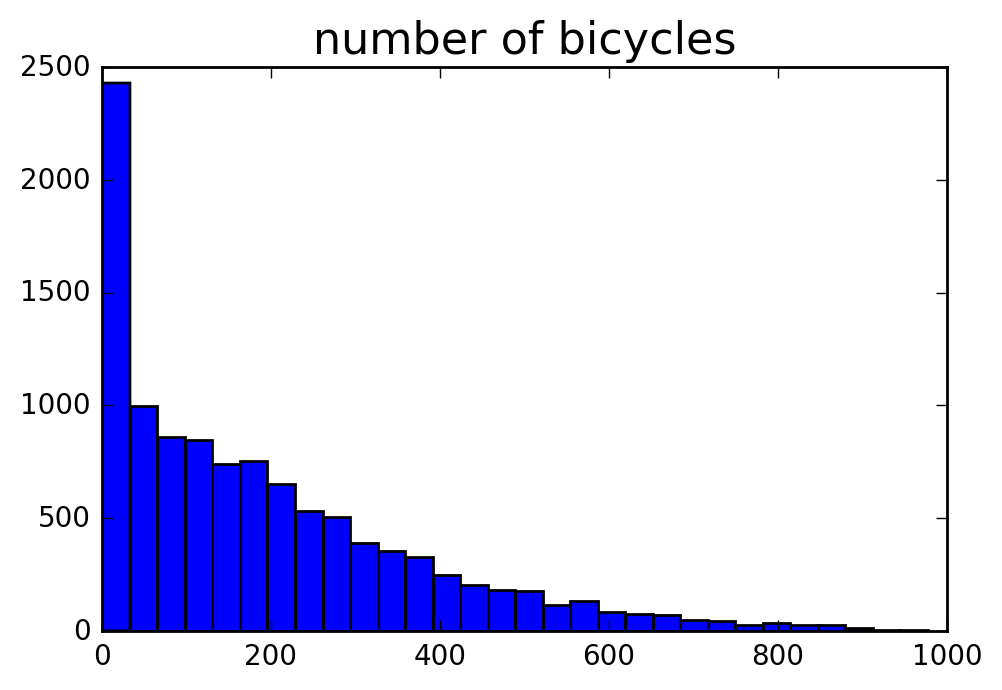

In [113]:
# Plot label distribution

fig = plt.figure(figsize=(12, 8)) # (width, height)

fig.add_subplot(221) # 2 x 2 grid, 1st subplot
h = plt.hist(y, bins=30, color='blue')
plt.title( 'number of bicycles', fontsize=16)

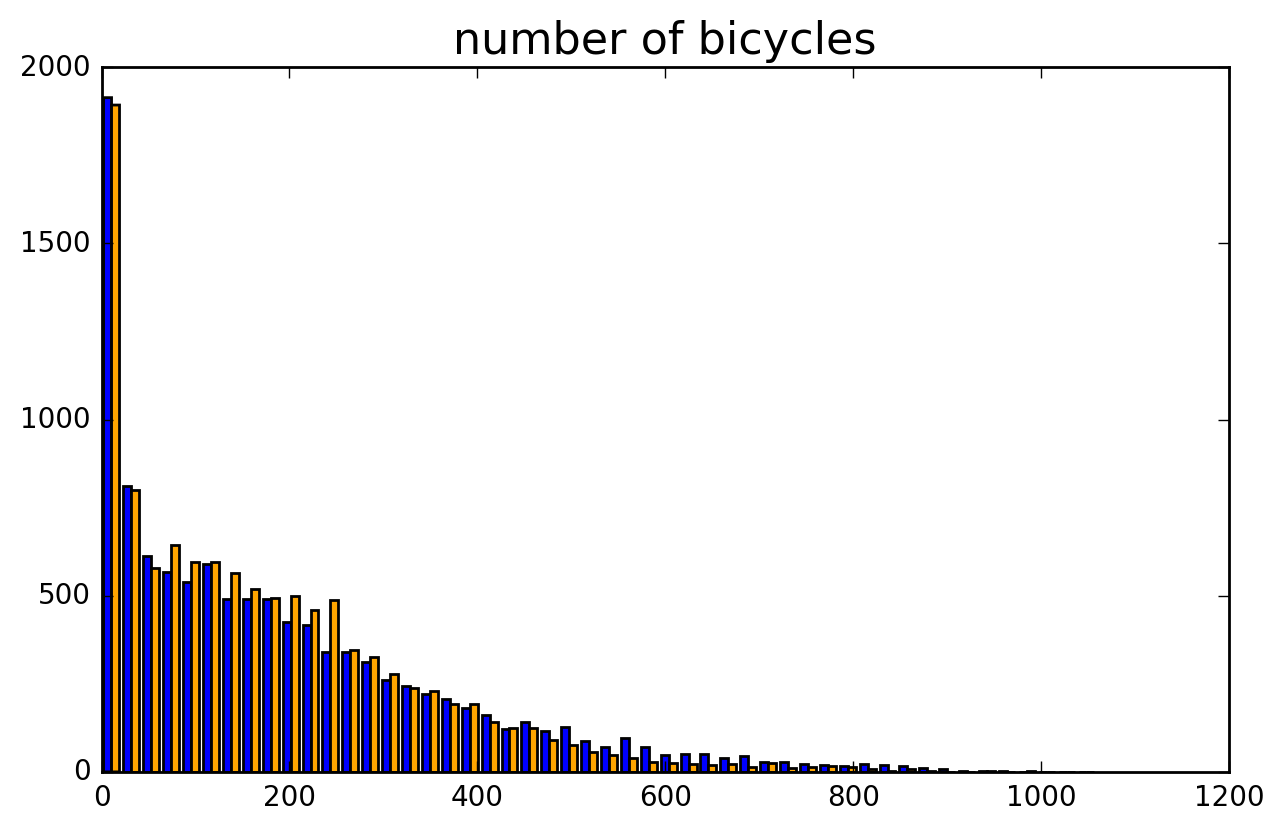

In [120]:
# Plot label distribution

fig = plt.figure(figsize=(16, 10)) # (width, height)

fig.add_subplot(221) # 2 x 2 grid, 1st subplot
h = plt.hist([y,ypred_clf], bins=50, color=['blue','orange'])
plt.title( 'number of bicycles', fontsize=16)

### RMSLE Formula

In [115]:
#Calculating the result: RMSLE

n_samples, n_features = X.shape

# \epsilon = \sqrt{\frac{1}{n} \sum_{i=1}^n (\log(p_i + 1) - \log(a_i+1))^2 }

def sle(actual, predicted):
    return (np.power(np.log(np.array(actual)+1) - np.log(np.array(predicted)+1), 2))

def msle(actual, predicted):
    return np.mean(sle(actual, predicted))

def rmsle(actual, predicted):
    return np.sqrt(msle(actual, predicted))

### Cross-Validation Function

In [116]:
# Set up a stratified 10-fold cross-validation
from sklearn import cross_validation
folds = cross_validation.StratifiedKFold(y, 10, shuffle=True, random_state=135)

In [117]:
# This is one way to access the training and test points
#for ix, (tr, te) in enumerate(folds):
#    print "Fold %d" % ix
#    print "\t %d training points" % len(tr)
#    print "\t %d test points" % len(te)

In [118]:
def cross_validate(design_matrix, labels, classifier, cv_folds):
    n_samples, n_features = design_matrix.shape
    pred = np.zeros(labels.shape)
    #y_prob = np.zeros((n_samples,2))
    
    for tr, te in cv_folds:
        classifier.fit(design_matrix[tr],labels[tr])
        pred[te] = classifier.predict(design_matrix[te])
        #y_prob[te] = classifier.predict_proba(design_matrix[te])
    return pred

# Parametric Methods

### Linear Regression

In [121]:
from sklearn import linear_model
#Instantiate the model
clf = linear_model.LinearRegression(fit_intercept=False)
#ypred_clf = cross_validate(X,y,clf,folds)

# Fit the model & predict
ypred_clf = cross_validate(X_dummy,log(1+y),clf,folds)
ypred_clf = exp(ypred_clf)-1
ypred_clf = np.round(ypred_clf,decimals=0)
ypred_clf = np.where(ypred_clf>0, ypred_clf, 0) # Ensure negative predictions are changed to 0...
#ypred_clf = np.where(ypred_clf<1000, ypred_clf, 1000) # Ensure some predictions are not too large..
print ypred_clf

[  20.    9.    5. ...,  177.  149.   96.]


In [122]:
clf.get_params()

{'copy_X': True, 'fit_intercept': False, 'n_jobs': 1, 'normalize': False}

In [123]:
#Calculate MSE
from sklearn.metrics import mean_squared_error as mse
print sqrt(mse(y,ypred_clf))
#Cross Validated RMSLE
print rmsle(y,ypred_clf)

96.3623989094
0.585001072568


In [456]:
# Comparing results with untransformed data (i.e. no dummy variables, no standardisation)
#ypred_clf_raw = cross_validate(A,log(1+y),clf,folds)
#ypred_clf_raw = exp(ypred_clf_raw)-1
#ypred_clf_raw = np.where(ypred_clf_raw>0, ypred_clf_raw,0)
#print ypred_clf_raw

In [540]:
#Calculate MSE
from sklearn.metrics import mean_squared_error as mse
print sqrt(mse(y,ypred_clf_raw))

#Cross Validated RMSLE
print rmsle(y,ypred_clf_raw)

NameError: name 'ypred_clf_raw' is not defined

It is clear that linear regression works much better with dummy variables & regularisation...

### Ridge Regression

In [124]:
from sklearn import grid_search 
# Instantiate the model
param_ridge = {'alpha':[1e-3,1e-2,1e-1,0, 1e1, 1e2, 1e3, 1e4, 1e5]}
clf_ridge = grid_search.GridSearchCV(linear_model.Ridge(fit_intercept=False), param_ridge)

In [125]:
# Fit and predict
ypred_ridge = cross_validate(X_dummy,log(1+y),clf_ridge,folds)
ypred_ridge = exp(ypred_ridge)-1
print clf_ridge.best_estimator_

Ridge(alpha=10.0, copy_X=True, fit_intercept=False, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)


In [460]:
print clf_ridge.best_estimator_.coef_.shape

(14,)


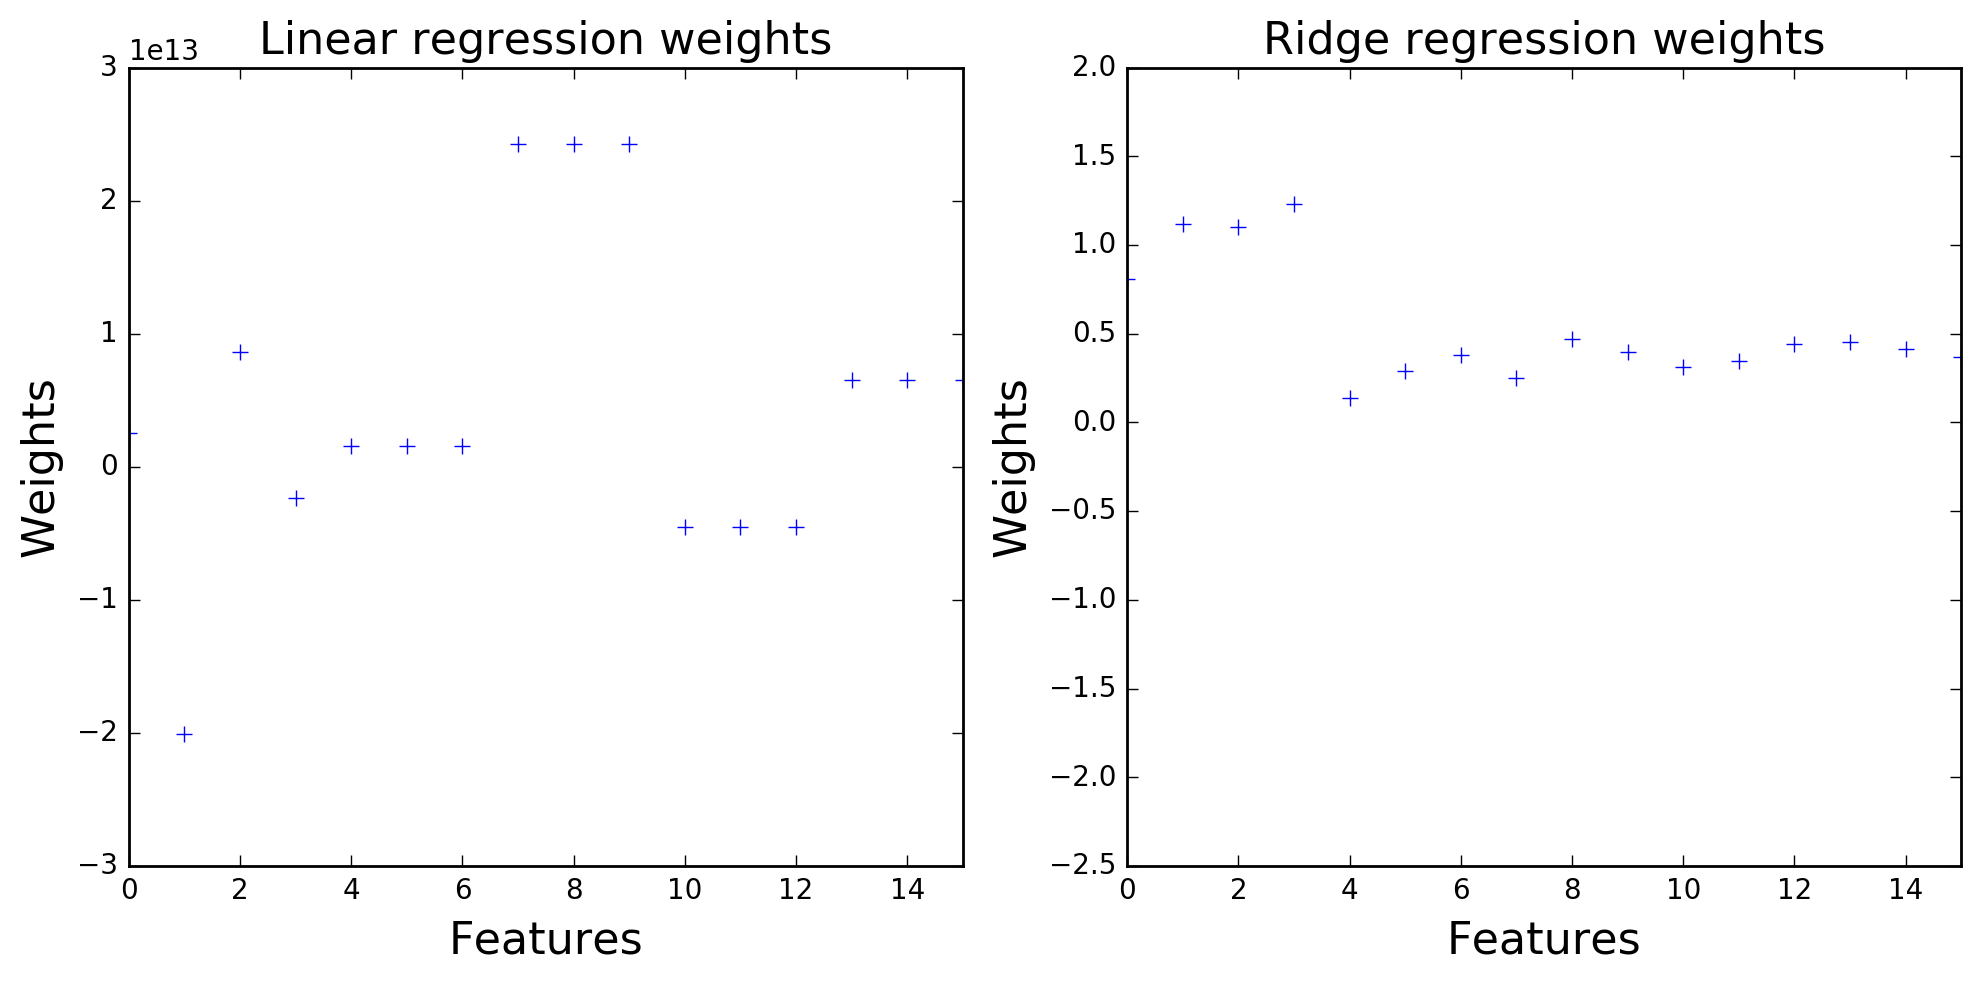

In [128]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(121) # use a 1x2 subplot grid; ax will refer to the 1st subplot

number_of_weights = len(clf.coef_)
clf_weights = clf.coef_

ax.plot(range(number_of_weights), clf_weights, 
         color='blue', marker='+', linestyle='')
ax.set_xlabel('Features', fontsize=16)
ax.set_ylabel('Weights', fontsize=16)
ax.set_title('Linear regression weights', fontsize=16)
ax.set_xlim([0, X.shape[1]])

ax = fig.add_subplot(122) # use a 1x2 subplot grid; ax will refer to the 2nd subplot

clf_ridge_weights = clf_ridge.best_estimator_.coef_

ax.plot(range(number_of_weights), clf_ridge_weights, 
         color='blue', marker='+', linestyle='')
ax.set_xlabel('Features', fontsize=16)
ax.set_ylabel('Weights', fontsize=16)
ax.set_title('Ridge regression weights', fontsize=16)
ax.set_xlim([0, X.shape[1]])
plt.tight_layout()
plt.savefig("Ridge_Reg.png")

In [126]:
ypred_ridge = np.where(ypred_ridge>0, ypred_ridge, 0) # Ensure negative predictions are changed to 0...
print ypred_ridge

[  17.8483289     8.85742371    5.06152624 ...,  176.54759874  150.27972142
   96.05408969]


In [127]:
print sqrt(mse(y,ypred_ridge))
print rmsle(y,ypred_ridge)

96.5152669375
0.582201803392


### Lasso Regression

In [135]:
# Instantiate the model
params_lasso = {'alpha':[1e-3,1e-2,1e-1, 1e1, 1e2, 1e3, 1e4, 1e5]}
clf_lasso = grid_search.GridSearchCV(linear_model.Lasso(fit_intercept=True, max_iter=10000), params_lasso)

In [136]:
# Predict and fit
ypred_lasso = cross_validate(X_dummy,log(1+y),clf_lasso,folds)
ypred_lasso = exp(ypred_lasso)-1
print clf_lasso.best_estimator_

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=10000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)


In [137]:
ypred_lasso = np.where(ypred_lasso>0, ypred_lasso, 0) # Ensure negative predictions are changed to 0...
print ypred_lasso

[  18.14079277    8.86108356    4.99543859 ...,  184.86525075  156.4466073
   99.09125512]


In [138]:
print sqrt(mse(y,ypred_lasso))
print rmsle(y,ypred_lasso)

96.4385190534
0.582051450021


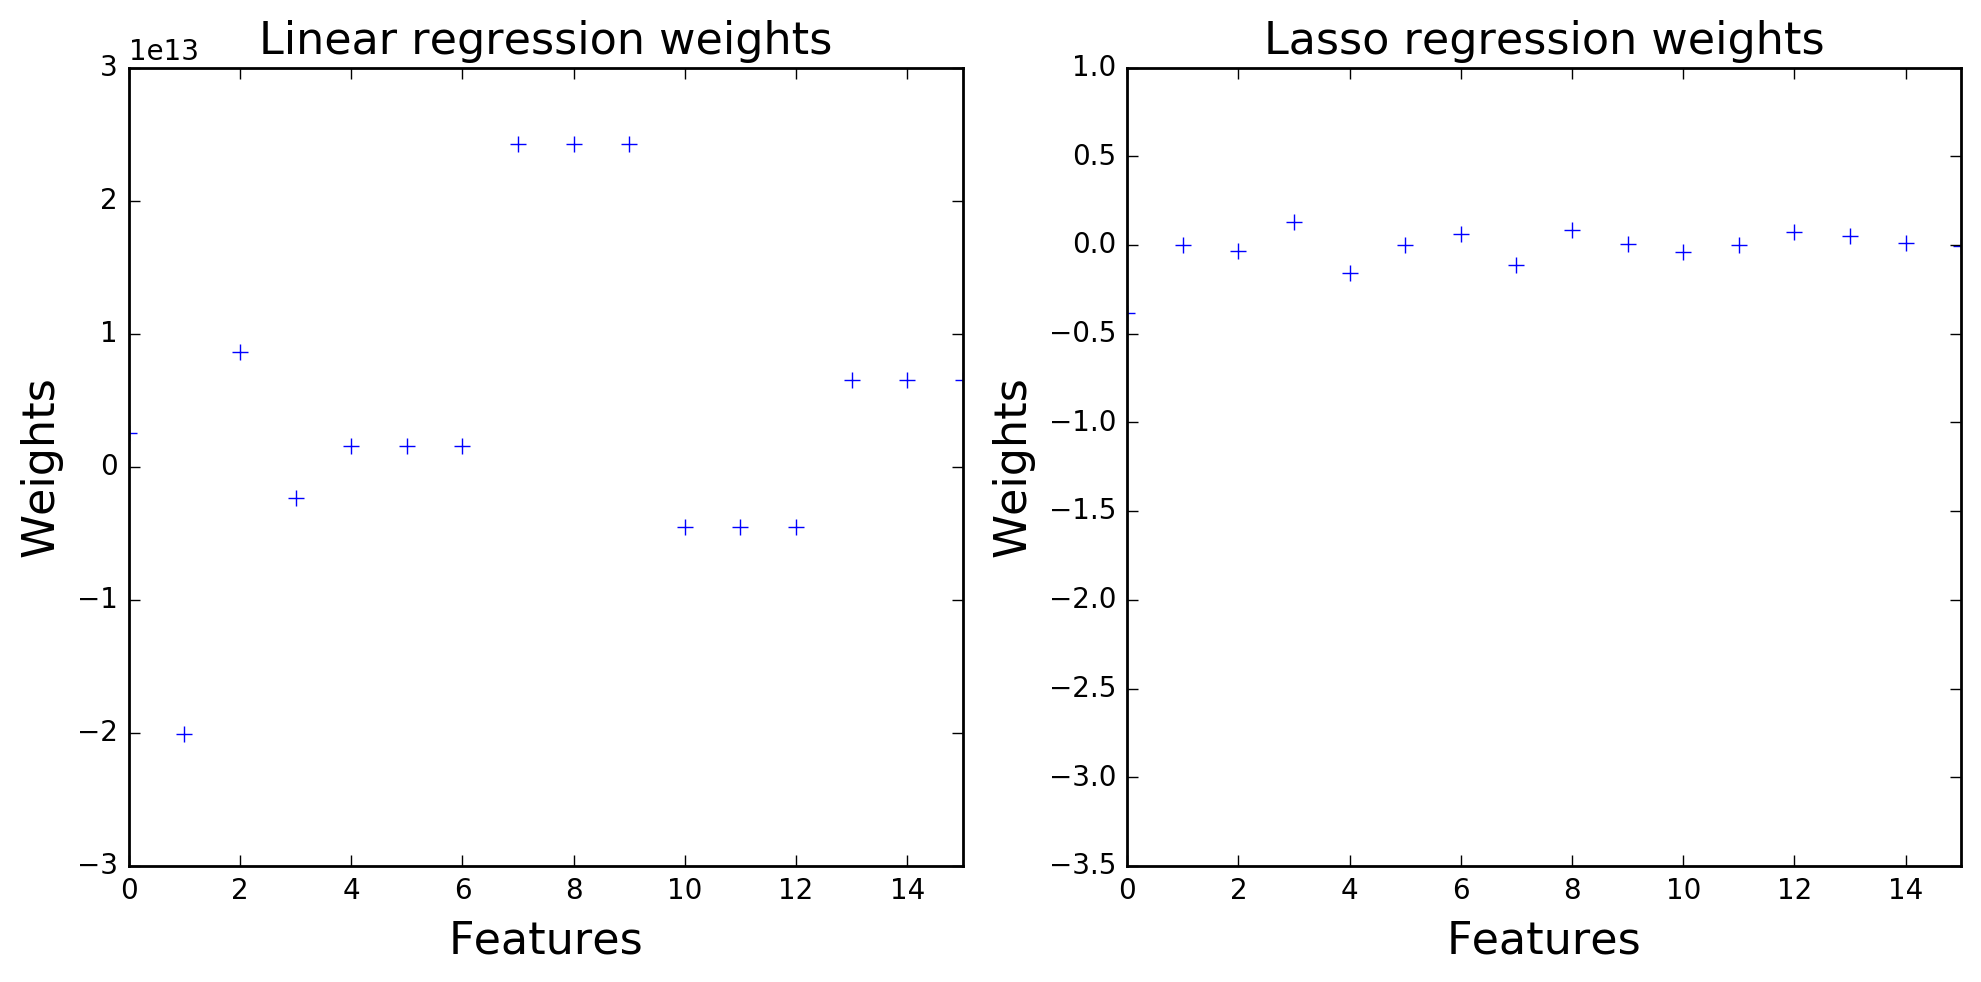

In [139]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(121) # use a 1x2 subplot grid; ax will refer to the 1st subplot

number_of_weights = len(clf.coef_)
clf_weights = clf.coef_

ax.plot(range(number_of_weights), clf_weights, 
         color='blue', marker='+', linestyle='')
ax.set_xlabel('Features', fontsize=16)
ax.set_ylabel('Weights', fontsize=16)
ax.set_title('Linear regression weights', fontsize=16)
ax.set_xlim([0, X.shape[1]])

ax = fig.add_subplot(122) # use a 1x2 subplot grid; ax will refer to the 2nd subplot

clf_lasso_weights = clf_lasso.best_estimator_.coef_

ax.plot(range(number_of_weights), clf_lasso_weights, 
         color='blue', marker='+', linestyle='')
ax.set_xlabel('Features', fontsize=16)
ax.set_ylabel('Weights', fontsize=16)
ax.set_title('Lasso regression weights', fontsize=16)
ax.set_xlim([0, X.shape[1]])
plt.tight_layout()
plt.savefig("Lasso_Reg.png")

### Elastic Net

In [552]:
# Instantiate the model
params_elastic = {'alpha':[1e-4,1e-3,1e-2], 'l1_ratio':[0.4,0.6, 0,8]}
clf_elastic = grid_search.GridSearchCV(linear_model.ElasticNet(fit_intercept=True, max_iter=1000), params_elastic)

In [553]:
# Predict and fit
ypred_elastic = cross_validate(X_dummy,log(1+y),clf_elastic,folds)
ypred_elastic = exp(ypred_elastic)-1
print clf_elastic.best_estimator_

ElasticNet(alpha=0.001, copy_X=True, fit_intercept=True, l1_ratio=0.6,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)


In [554]:
ypred_elastic = np.where(ypred_elastic>0, ypred_elastic, 0) # Ensure negative predictions are changed to 0...
print ypred_elastic

[  18.15016509    8.92174912    5.06064694 ...,  176.52314044  154.30614779
   97.98209914]


In [555]:
print sqrt(mse(y,ypred_elastic))
print rmsle(y,ypred_elastic)

96.4970828054
0.581894308559


# Non-Parametric Methods

### Random Forest

In [558]:
RandomForestRegressor?

In [78]:
from sklearn import grid_search
from sklearn.ensemble import RandomForestRegressor
params_forest ={'n_estimators':[280,300],'max_features':["auto"],'min_samples_leaf':[2]}
clr = grid_search.GridSearchCV(RandomForestRegressor(), params_forest)
y_random = cross_validate(X,log(1+y),clr,folds)

y_random = exp(y_random)-1
print y_random

[  28.54876355   20.23877958   13.93749582 ...,  198.2262884   162.12026679
   92.23912974]


In [79]:
print clr.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=2,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=300, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


In [80]:
rmsle(y,y_random)

0.29868760809120554

### Extremely Randomised Tree

In [56]:
ExtraTreesRegressor?

In [66]:
from sklearn.ensemble import ExtraTreesRegressor
params_extra ={'n_estimators':[45], 'max_features':["auto"], 'min_samples_leaf':[2,3]}
etr = grid_search.GridSearchCV(ExtraTreesRegressor(), params_extra)
y_etr = cross_validate(X,log(1+y),etr,folds)

y_etr = exp(y_etr)-1
print y_etr

[  31.97435566   19.6438626    14.43488797 ...,  198.75282259  149.79851199
   80.59106328]


In [67]:
etr.best_estimator_

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_split=1e-07, min_samples_leaf=3,
          min_samples_split=2, min_weight_fraction_leaf=0.0,
          n_estimators=45, n_jobs=1, oob_score=False, random_state=None,
          verbose=0, warm_start=False)

In [68]:
rmsle(y,y_etr)

0.29977343107326238

### Gradient Boosting

In [71]:
from sklearn.ensemble import GradientBoostingRegressor
GradientBoostingRegressor?

In [82]:
from sklearn.ensemble import GradientBoostingRegressor
params_gbr ={'max_depth':[3],'n_estimators':[800],'learning_rate':[0.1],'subsample':[0.9],'min_samples_leaf':[2,3]}
gbr = grid_search.GridSearchCV(GradientBoostingRegressor(),params_gbr)
y_gbr = cross_validate(X,log(1+y),gbr,folds)

y_gbr = exp(y_gbr)-1
print y_gbr

[  28.89080693   17.81107855   13.27610046 ...,  209.25333604  156.92353071
   87.38192028]


In [83]:
print gbr.best_estimator_

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=2, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=800,
             presort='auto', random_state=None, subsample=0.9, verbose=0,
             warm_start=False)


In [140]:
rmsle(y,y_gbr)

0.28469000560334301

In [85]:
#cross validated averaged model
y_avg = sum([y_gbr,y_random,y_etr],axis=0)/3

rmsle(y,y_avg)

0.28152553369341926

### Extracting Numpy Array to CSV

In [578]:
#gradient boosting
prediction_gbr = gbr.predict(T)
prediction_gbr = exp(prediction_gbr)-1
print prediction_gbr

#random forest
prediction_random = clr.predict(T)
prediction_random = exp(prediction_random)-1
print prediction_random

#extreme tree
prediction_etr = etr.predict(T)
prediction_etr = exp(prediction_etr)-1
print prediction_etr

[   9.44400411    4.63745711    2.59859703 ...,  136.10627629  101.17777498
   55.63271659]
[  10.59232433    5.40903576    2.76912871 ...,  129.95853282  104.43446183
   54.38536328]
[   9.2982991     3.78419585    2.75418151 ...,  161.27159354  111.19423078
   51.29773828]


In [579]:
#averaging results

prediction = sum([prediction_gbr,prediction_random,prediction_etr],axis=0)/3

print prediction.shape
print prediction

(6493,)
[   9.77820918    4.61022957    2.70730242 ...,  142.44546755  105.60215586
   53.77193938]


In [580]:
prediction = np.round(prediction,decimals=0)

print prediction

prediction = prediction.astype(numpy.int64)
prediction = np.where(prediction>0, prediction, 0)

print prediction

prediction = transpose(prediction)

submission = np.column_stack((inst,prediction))
print submission

np.savetxt("pred_average_randomforest_gbr_extremetree.csv", submission, delimiter=",", fmt='%1.0f', header="Id,Prediction", comments='')

[  10.    5.    3. ...,  142.  106.   54.]
[ 10   5   3 ..., 142 106  54]
[[  4.32000000e+02   1.00000000e+01]
 [  4.33000000e+02   5.00000000e+00]
 [  4.34000000e+02   3.00000000e+00]
 ..., 
 [  1.73770000e+04   1.42000000e+02]
 [  1.73780000e+04   1.06000000e+02]
 [  1.73790000e+04   5.40000000e+01]]


### Notes on submissions results

* Linear Regression, no regularisation, rmsle = 2.58921
* Linear Regression, no regularisation, fit_intercept = False, rmsle = 2.58876
* Ridge Regression, l2 regularisation, alpha = 10, rmsle = 0.64672
* Lasso Regression, l1 regularisation, alpha = 0,001, rmsle = 0.64157
* Elastic Net Regression, alpha = 0,001, l1 ratio = 0,6 , rmsle = 0.62205
* Gradient Boosting Regression, 

### Advice from Labs
#Lab 3
* Load the data -> Done
* How many features do you have? How are they encoded?
* Plot histograms to visualize the distribution of your features. Should you scale or normalize them?
* Set up a cross-validation that you will use for all your evaluations. Notice there is a 'random_state' parameter to the cross-validation methods of scikit-learn, that you can use to ensure you always get the same splits. -> Done
* [Optional] To go one step further in ensuring a fair comparison of your algorithms, you can use multiple repeats of the cross-validation procedure (using different splits each time), and report the mean & standard deviation over the repeats of the performance obtained. If you do this, you can report standard deviations in plots by using error bars.
* Evaluate the performance of a linear regression on your data. Which evaluation metric are you using? See http://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics for help defining one.
* Submit a linear regression predictor to the leaderboard

#Lab 4
* Cross-validate an l1-regularized linear regression (lasso) on your data, using the folds you previously set up for non-regularized linear regression. Do you obtain better performance? Can you draw some conclusions regarding the usefulness of the different features for the prediction task?
* Cross-validate an l2-regularized linear regression (ridge regression) on your data, using the folds you previously set up for non-regularized linear regression. Do you obtain better performance?
* Submit predictions to the leaderboard for both those models. Do the results on the leaderboard data match your expectations?

#lab 5
* Cross-validate several different nearest neighbors regressors (different=that use different parameters) on your data, using the folds you previously set up. How do the different variants of nearest neighbors compare to each other? * How do they compare to performance obtained with other algorithms?
* Submit predictions to the leaderboard for the best of your nearest-neighbors models. Do the results on the leaderboard data match your expectations?